<a href="https://colab.research.google.com/github/ClovisMonteiro/Redes_neurais/blob/master/Arquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definindo uma arquitetura no PyTorch

### Carregando dados

Exemplo de dados não linerares separáveis( Distribuição em lua ):
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html


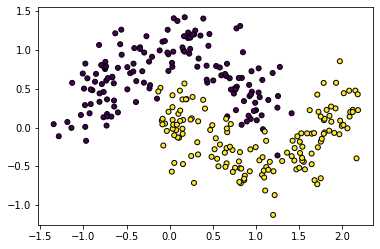

In [22]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

## nn.Sequential

O módulo nn.Sequantial é um container onde se pode colocar múltiplos módulos. Ao realizar um foward em um objeto sequential apricará sequencialmente os módulos nele contidaspara gerar uma saída.
Exemplo abaixo desse módulo contendo 2 camadas Linear intercaladas por uma função de ativação ReLU.

In [23]:
import torch 
from torch import nn #neural network

input_size = 2
output_size = 1
hidden_size = 4

net = nn.Sequential(nn.Linear(in_features = input_size , out_features= hidden_size ),  # hidden (escondida)
                    nn.ReLU(), # ativação não linear
                    nn.Linear(in_features=hidden_size  , out_features = output_size)) #output(saída)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)


O módulo Summary da biblioteca torchsummary nos permite visualizar mais informações sobre a nossa rede, como a quantidade de parãmetros e o tamanho que cada elemento ocupa na memória.
Para mais informações ou consutar posteriormente:  https://github.com/sksq96/pytorch-summary

In [24]:
from torchsummary import summary

summary(net, input_size= (1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
              ReLU-2                 [-1, 1, 4]               0
            Linear-3                 [-1, 1, 1]               5
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Foward


In [0]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

# Classe torch.nn.Module()

A foram mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe nn.Module. Para redes pequenas, como as que estamos aprendendo até o momento, sua importancia pode não se destacar, mas modelos maiores com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

- Funções obrigatórias nn.Module:
  - `__init()__` : definição de hiperparâmetros e instância do modelo
  - forward() Fluxo de entrada para produzir uma saída

pytorch.org/docs/stable/nn.html

In [0]:
class MinhaRede(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, input_size)

  def forward(self, X):
      # Gerar uma saída a partir do X
      hidden = self.relu(self.hidden(X))
      output = self.output(hidden)

      return output

               

Instanciando a rede

In [8]:
input_size = 2
output_size = 8
hidden_size = 1

net = MinhaRede(input_size,hidden_size, output_size ) #Chama inicialmente o método init

print(net)


MinhaRede(
  (hidden): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=1, out_features=2, bias=True)
)


In [0]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

# Subindo informações para a GPU

Para conseguir executar modelos maiores em tempo hábil, é preciso carregar as informações na GPU para que o processamento seja realizado por ela. Dentre as informações que conhecemos até o momento, duas delas precisam ser caregadas na GPU:
 - Entrada
 - Rede
 
A célula a seguir contém a implementação sugerida para realizar esse processo.
É importante verificar se o notebook está na configuração desejada (CPU/GPU). Para isso, basta acessar **Edit-> Notebook Settings** e definir o hardware desejado.

In [5]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [9]:
output_size = 8
hidden_size = 1

net = MinhaRede(input_size,hidden_size, output_size ) #Chama inicialmente o método init
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=1, out_features=2, bias=True)
)


In [13]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)

print(tensor)

#pred = net(tensor)
#print(pred.size())

(300, 2)
tensor([[ 8.1965e-01,  4.5787e-01],
        [ 1.9473e+00,  1.8783e-01],
        [ 6.8545e-01, -5.1107e-01],
        [-8.2975e-01,  7.4983e-01],
        [ 8.0088e-01,  7.9249e-01],
        [ 1.3857e+00, -7.8184e-01],
        [ 2.6433e-01,  9.5258e-01],
        [ 7.1180e-01, -1.0709e-01],
        [ 4.7776e-02, -1.6876e-01],
        [ 1.0901e+00, -6.3997e-01],
        [ 1.7695e+00,  7.6298e-01],
        [ 2.1167e+00, -4.0687e-01],
        [-5.6492e-02,  1.8604e-03],
        [ 1.8721e+00, -2.1351e-01],
        [ 3.0943e-01, -2.0120e-01],
        [-2.9027e-01,  1.2009e+00],
        [-9.6801e-01,  2.1179e-01],
        [ 2.0881e+00,  2.9905e-01],
        [-1.0694e+00,  3.8673e-01],
        [ 5.2445e-01,  2.2319e-01],
        [-4.1376e-02,  2.6564e-01],
        [-1.1216e+00,  3.1412e-01],
        [ 2.1592e+00, -1.6642e-01],
        [-4.9640e-01,  8.3392e-01],
        [ 8.6329e-01,  7.6617e-01],
        [ 4.3922e-01,  8.6283e-02],
        [ 1.1260e+00, -5.6159e-01],
        [ 1.0209e+0